# Decision Tree

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from src.decisiontree import DecisionTree
import src.utils as utils

In [3]:
df = pd.read_csv("data/diamonds.csv")
X_train, X_test, y_train, y_test = utils.preprocessing_LOS(df)

In [4]:
from sklearn.model_selection import GridSearchCV

param_grid = {
	'max_depth': [3, 5, 8, 10, 15]
}

grid_search = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
sorted(zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']), reverse=True)

[(0.7490709685215565, {'max_depth': 10}),
 (0.7460449096147894, {'max_depth': 8}),
 (0.7444520456610854, {'max_depth': 15}),
 (0.7348428614435175, {'max_depth': 5}),
 (0.7137662080981612, {'max_depth': 3})]

Seems the optimal max_depth is between 10 and 8

In [5]:
param_grid = {
	'max_depth': [7, 8, 9, 10, 11]
}

grid_search2 = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search2.fit(X_train, y_train)
sorted(zip(grid_search2.cv_results_['mean_test_score'], grid_search2.cv_results_['params']), reverse=True)

[(0.7490709685215565, {'max_depth': 10}),
 (0.7485400596702161, {'max_depth': 11}),
 (0.7460449096147894, {'max_depth': 8}),
 (0.7457262656580591, {'max_depth': 9}),
 (0.7407623885631323, {'max_depth': 7})]

In [6]:
model = DecisionTree(random_state=42, max_depth=10)

In [7]:
model.cross_validation(X_train, y_train, n_splits=5, val_size=0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Cross validation (accuracy) scores:
	mean: 0.7512143331121434 std: 0.0033538590081464413


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.7s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.7s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.7s finished


In [8]:
model.fit(X_train, y_train)

DecisionTree(max_depth=10)

In [9]:
# DEPRECATED, this was for 6 features and depth = 6
# plt.figure(figsize=(170, 20))
# class_names = df_copy["cut"].unique()
# plot_tree(model, feature_names=X_train.columns, class_names=class_names, filled=True, fontsize=10)
# plt.show()

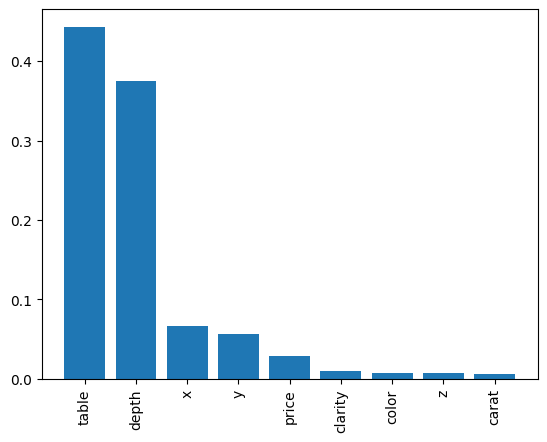

In [9]:
model.importances(features=X_train.columns, show=True)

Now let's remove some not important features (`carat`) and repeat the process.

In [13]:
X_train, X_test, y_train, y_test = utils.preprocessing_LOS(df.drop(columns=["carat"]))
X_train.head()

,color,clarity,depth,table,price,x,y,z
0,-0.327511,-0.505984,1.016451,-0.122983,2.880530,2.181772,2.068452,2.248956
1,-0.920493,0.648331,0.181361,0.867020,1.857718,1.240841,1.172543,1.219501
2,0.265471,1.802646,-0.653730,-1.112986,-0.793870,-0.762431,-0.751625,-0.806727
3,0.265471,1.225489,-0.004215,-0.617984,-0.846563,-1.177250,-1.169037,-1.166219
4,-0.327511,-1.083141,0.645300,-0.122983,3.029224,1.847894,1.783390,1.889464


In [14]:
param_grid = {
	'max_depth': [3, 5, 8, 10, 15]
}

grid_search = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
sorted(zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']), reverse=True)

[(0.7505882317989376, {'max_depth': 10}),
 (0.7461198154684782, {'max_depth': 8}),
 (0.7455115667738406, {'max_depth': 15}),
 (0.7366807044744944, {'max_depth': 5}),
 (0.7151317840132565, {'max_depth': 3})]

In [15]:
param_grid = {
	'max_depth': [7, 8, 9, 10, 11]
}

grid_search2 = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search2.fit(X_train, y_train)
sorted(zip(grid_search2.cv_results_['mean_test_score'], grid_search2.cv_results_['params']), reverse=True)

[(0.7505882317989376, {'max_depth': 10}),
 (0.7502444493920659, {'max_depth': 11}),
 (0.7487638876607214, {'max_depth': 9}),
 (0.7461198154684782, {'max_depth': 8}),
 (0.7436875686584415, {'max_depth': 7})]

In [16]:
model = DecisionTree(random_state=42, max_depth=10)
model.cross_validation(X_train, y_train, n_splits=5, val_size=0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.6s remaining:    1.0s


Cross validation (accuracy) scores:
	mean: 0.7499272967614011 std: 0.007982824244302024


[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished


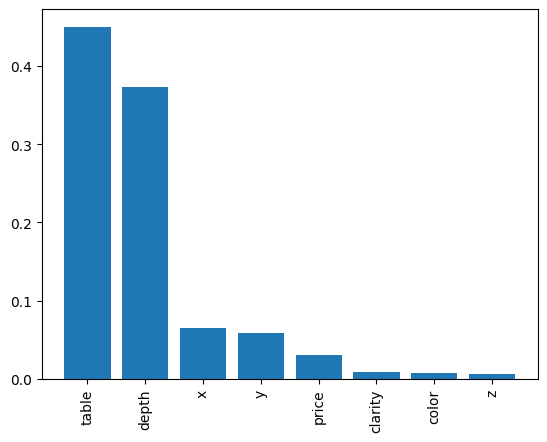

In [17]:
model.fit(X_train, y_train)
model.importances(features=X_train.columns, show=True)

We observe that without `carat`, the model has less accuracy (mean: 0.751 -> 0.749) and more variance of accuracies (std: 0.0033 -> 0.0079). But the change is minimal.

Now let's try combining `x`, `y` and `z` into one single feature.

In [18]:
X_train, X_test, y_train, y_test = utils.preprocessing_LOS(utils.preprocessing_C(df))
X_train.head()

,carat,color,clarity,depth,table,price,volume
0,1.607207,2.067081,0.641565,1.387482,-0.121174,0.365646,1.662134
1,0.875508,-1.509466,-0.514065,-0.004712,1.373407,0.531155,0.832753
2,0.550309,1.470990,-1.091879,2.037172,0.377020,-0.275245,0.387000
3,-0.967289,0.874899,1.219380,-1.768158,0.875213,-0.757918,-0.960308
4,-1.048589,-0.913375,-1.091879,-0.561590,0.377020,-0.940197,-1.060600


In [19]:
param_grid = {
	'max_depth': [3, 5, 8, 10, 15]
}

grid_search = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
sorted(zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']), reverse=True)

[(0.7383354466136092, {'max_depth': 8}),
 (0.735654894991103, {'max_depth': 10}),
 (0.7356547329729486, {'max_depth': 5}),
 (0.7140507990312723, {'max_depth': 3}),
 (0.7123784863841351, {'max_depth': 15})]

In [20]:
param_grid = {
	'max_depth': [7, 8, 9, 10, 11]
}

grid_search2 = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search2.fit(X_train, y_train)
sorted(zip(grid_search2.cv_results_['mean_test_score'], grid_search2.cv_results_['params']), reverse=True)

[(0.7397686415975271, {'max_depth': 7}),
 (0.7386539144290551, {'max_depth': 9}),
 (0.7383354466136092, {'max_depth': 8}),
 (0.735654894991103, {'max_depth': 10}),
 (0.7320452573059623, {'max_depth': 11})]

In [21]:
model = DecisionTree(random_state=42, max_depth=7)
model.cross_validation(X_train, y_train, n_splits=5, val_size=0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Cross validation (accuracy) scores:
	mean: 0.7399681528662421 std: 0.0024519765313059452


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.6s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.4s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


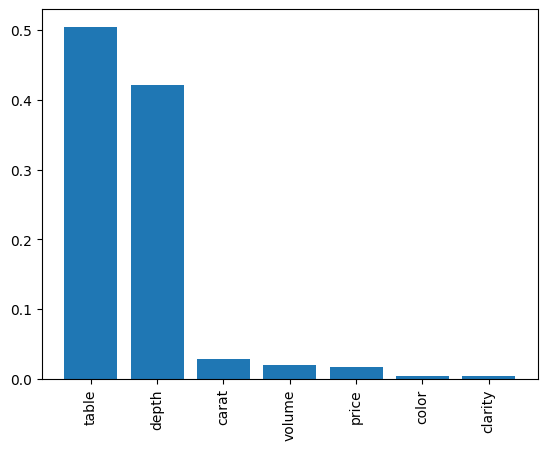

In [22]:
model.fit(X_train, y_train)
model.importances(features=X_train.columns, show=True)

The accuracy has decreased a bit more (mean: 0.751 -> 0.739). Also, we observe that, after this combination of features, `carat` gains more much importance, which make us think that maybe we should keep it, as its importance agains other features is not clear at all.

Let's make one last attempt, this time we will use one hot encoding for the categorical features (except the `cut`, which is the target and makes more sense to encode it to a range [0,4])

In [26]:
X_train, X_test, y_train, y_test = utils.preprocessing_HOS(df)

print(len(X_train.columns))
X_train.head()

22


,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.822074,-1.581567,-1.114564,1.244186,1.012693,1.064726,0.849903,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.524089,0.549452,-0.617542,-0.001790,0.603172,0.518935,0.618381,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,2.528717,1.290676,-0.120520,1.916947,2.067207,1.981244,2.189422,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,0.794984,0.271493,0.873523,1.276274,0.818170,0.858767,0.866440,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0.063566,0.827411,0.376501,-0.144729,0.224366,0.158506,0.271099,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [27]:
param_grid = {
	'max_depth': [5, 10, 15, 20, 25]
}

grid_search = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)
sorted(zip(grid_search.cv_results_['mean_test_score'], grid_search.cv_results_['params']), reverse=True)

[(0.7475313839371667, {'max_depth': 10}),
 (0.7460182470301852, {'max_depth': 15}),
 (0.7348428614435175, {'max_depth': 5}),
 (0.7265342814850932, {'max_depth': 20}),
 (0.7153058349593764, {'max_depth': 25})]

In [28]:
param_grid = {
	'max_depth': [9, 10, 11, 12, 13, 14, 15, 16]
}

grid_search2 = GridSearchCV(DecisionTree(random_state=42), param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search2.fit(X_train, y_train)
sorted(zip(grid_search2.cv_results_['mean_test_score'], grid_search2.cv_results_['params']), reverse=True)

[(0.7489116412585881, {'max_depth': 11}),
 (0.7488055475650398, {'max_depth': 12}),
 (0.7481950138359718, {'max_depth': 13}),
 (0.7480887827427407, {'max_depth': 14}),
 (0.7475313839371667, {'max_depth': 10}),
 (0.7460182470301852, {'max_depth': 15}),
 (0.7455404378716507, {'max_depth': 9}),
 (0.7402845688353915, {'max_depth': 16})]

In [29]:
model = DecisionTree(random_state=42, max_depth=11)
model.cross_validation(X_train, y_train, n_splits=5, val_size=0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Cross validation (accuracy) scores:
	mean: 0.7495686794956868 std: 0.0033668576977681094


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.5s remaining:    3.8s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.5s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.6s finished


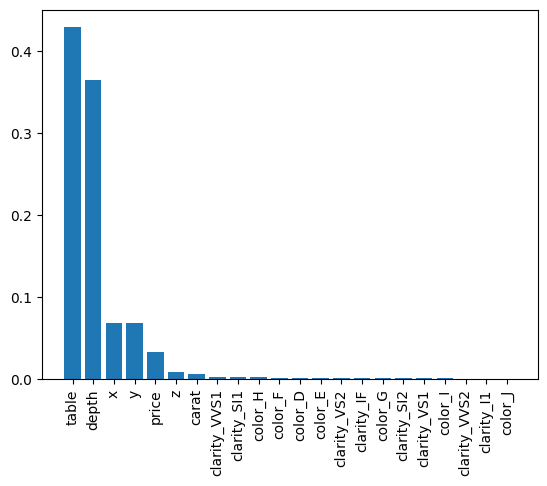

In [30]:
model.fit(X_train, y_train)
model.importances(features=X_train.columns, show=True)

We can see the accuracy slightly decreased (mean: 0.751 -> 0.749), which is insignificant, and the importance of the hot-encoded features is very low. Due to the nature of Decision Trees, it might not make sense at all to one-hot encode features, but with this experiment we have made sure of it.

After all this analysis we made with the help of decision trees, we conclude that the best we can do is train the models with all the features. The encoding of categorical features and handling of outliers will be a decision to make for every different model we train.